# Analyse en Composantes Principales (ACP)

### Objectif du cours

- Comprendre les étapes d’une ACP (normalisation, valeurs propres, inertie).

- Produire les visualisations clés :

    ✔ Eboulis
    
    ✔ Cercle des corrélations
    
    ✔ Carte des individus
    

- Interpréter les axes et la structure des données.

## 1. Importation et standardisation

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger les données
df = pd.read_csv("USArrests.csv", index_col=0)

# Standardiser les données
X = StandardScaler().fit_transform(df)

## 2. ACP avec scikit-learn

In [34]:
# ACP
pca = PCA()
pca.fit(X)

# Coordonnées principales
coords = pca.transform(X)
display(coords)

array([[ 9.85565885e-01,  1.13339238e+00, -4.44268788e-01,
         1.56267145e-01],
       [ 1.95013775e+00,  1.07321326e+00,  2.04000333e+00,
        -4.38583440e-01],
       [ 1.76316354e+00, -7.45956781e-01,  5.47808243e-02,
        -8.34652924e-01],
       [-1.41420290e-01,  1.11979678e+00,  1.14573692e-01,
        -1.82810896e-01],
       [ 2.52398013e+00, -1.54293399e+00,  5.98556799e-01,
        -3.41996478e-01],
       [ 1.51456286e+00, -9.87555085e-01,  1.09500699e+00,
         1.46488703e-03],
       [-1.35864746e+00, -1.08892789e+00, -6.43257569e-01,
        -1.18469414e-01],
       [ 4.77093091e-02, -3.25358925e-01, -7.18632942e-01,
        -8.81977637e-01],
       [ 3.01304227e+00,  3.92285133e-02, -5.76829492e-01,
        -9.62847520e-02],
       [ 1.63928304e+00,  1.27894240e+00, -3.42460080e-01,
         1.07679681e+00],
       [-9.12657146e-01, -1.57046001e+00,  5.07818939e-02,
         9.02806864e-01],
       [-1.63979985e+00,  2.10972917e-01,  2.59801342e-01,
      

## 3. Éboulis des valeurs propres

Variance individuelle (%): [62.006 24.744  8.914  4.336]
Variance cumulée (%):     [ 62.006  86.75   95.664 100.   ]


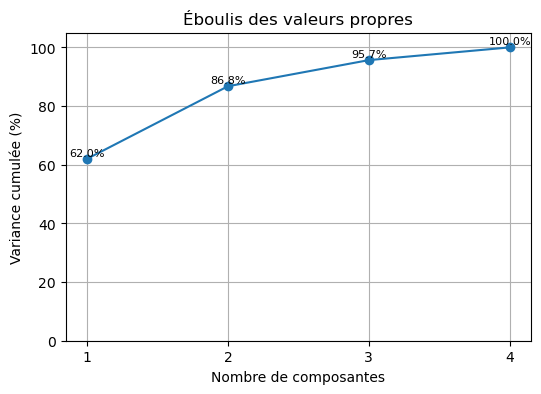

In [37]:
import numpy as np
import matplotlib.pyplot as plt


# Calculer la variance expliquée et la variance cumulée
ratio = pca.explained_variance_ratio_ * 100        # % par composante
cum = np.cumsum(ratio)                             # variance cumulée

# Vérification rapide (affiche les valeurs)
print("Variance individuelle (%):", np.round(ratio, 3))
print("Variance cumulée (%):    ", np.round(cum, 3))

# Graphe d'éboulis correct et robuste
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cum)+1), cum, marker='o')
plt.xticks(range(1, len(cum)+1))
for i, v in enumerate(cum, start=1):
    plt.text(i, v+1.0, f"{v:.1f}%", ha='center', fontsize=8)  # annoter les points

plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée (%)")
plt.title("Éboulis des valeurs propres")
plt.ylim(0, 105)
plt.grid(True)
plt.show()

## 4. Cercle des corrélations

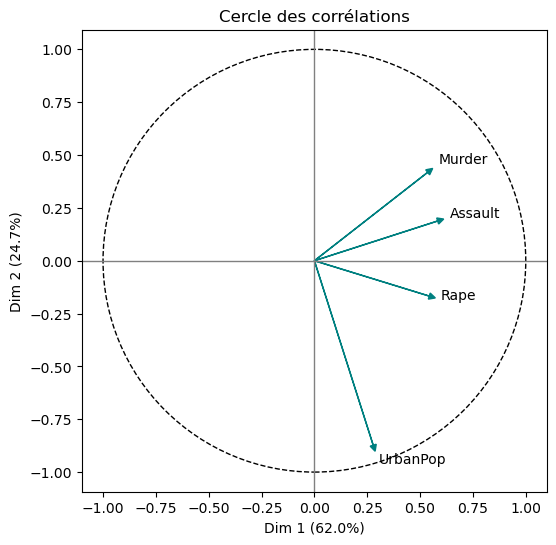

In [5]:
# Coordonnées des variables
pcs = pca.components_

plt.figure(figsize=(6,6))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

for i in range(len(df.columns)):
    plt.arrow(0,0, pcs[0,i], pcs[1,i], 
              head_width=0.03, head_length=0.03, color='teal')
    plt.text(pcs[0,i]*1.1, pcs[1,i]*1.1, df.columns[i])

circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='black', linestyle='--')
plt.gca().add_patch(circle)

plt.xlabel(f"Dim 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"Dim 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Cercle des corrélations")
plt.axis("equal")
plt.show()

murder,assault et rape sont fortement correle et ils sont proche au premier axe dim1 qui represente( 

## 5. Carte des individus

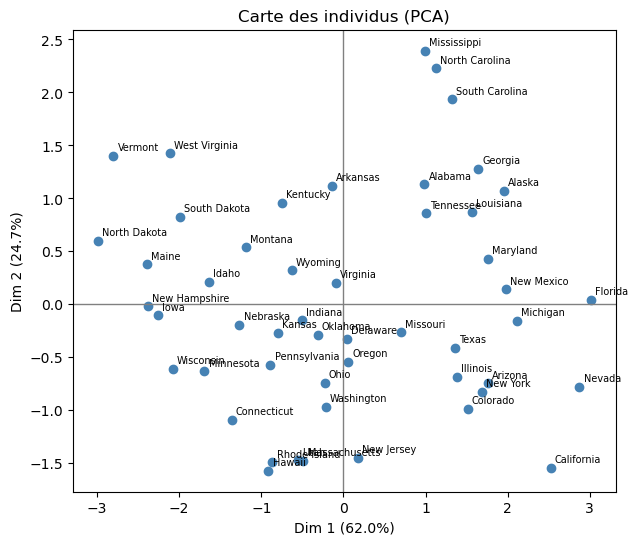

In [6]:
plt.figure(figsize=(7,6))
plt.scatter(coords[:,0], coords[:,1], color='steelblue')

for i, label in enumerate(df.index):
    plt.text(coords[i,0]+0.05, coords[i,1]+0.05, label, fontsize=7)

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

plt.xlabel(f"Dim 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"Dim 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Carte des individus (PCA)")
plt.show()

### **📝 EXERCICES**

**Exercice 1 — Standardisation**

**1.** Pourquoi doit-on standardiser les données avant une ACP ?

**2.** Quel serait le risque si on ne le fait pas ?

1. Nous devons standariser les donnees avant l'ACP pour ne pas avoir une variable qui domine l'autre exemple (Assault) 
2. les petits variables devient invisible,les variables avec les grandes valeurs vont etre comme des composantes principales et on aura des mauvaises resulatas et interpretations 

**Exercice 2 — Éboulis**

**1.** Quelle proportion de variance est expliquée par les deux premiers axes ?

**2.** Combien d’axes faut-il retenir et pourquoi ?

1. 
2. 2 axes car l'inertie est >80%

**Exercice 3 — Cercle des corrélations**

**1.** Quelle variable contribue le plus à Dim 1 ?

**2.** Quelle variable est la plus corrélée à Dim 2 ?

**3.** Interpréter la position de UrbanPop sur le cercle.

1. 3 variables murder,assault et rape 
2. UrbanPop elle proche du cercle (dim2 est domine par UrbanPop) represent l'urbanisationvs u
   droite=>dangereuse , gauche=>safe,haut=> , bas=>
4. 

**Exercice 4 — Carte des individus**

**1.** Quelles sont les 3 États les plus extrêmes sur l’axe 1 ?

**2.** Pourquoi sont-ils à ces positions ?

1. dim 1 : Florida,california,nevada=> criminalité   north dakota,maine,  =>safety
2. dim 2 : new jersey,

## ACP sur dataset : Learners_Digital_clean.csv

### Étape 1 — Charger ton dataset

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Charger dataset
df1 = pd.read_csv("Learners_Digital_2FACTEURS_full.csv")

# 2. Sélectionner les colonnes numériques pour l’ACP
df_acp = df1[["Temps_Connexion_h", "Activités_Complétées", "Score_Quiz_%"]]

# 3. Standardiser
X = StandardScaler().fit_transform(df_acp)

la normalisation 
les axes
le cercle de corellation et interpretation
identification des groupes

### Étape 2 — ACP

In [60]:
pca = PCA()
pca.fit(X)
coords = pca.transform(X)
pcs = pca.components_

### Éboulis

Variance individuelle (%): [63.252 33.277  3.471]
Variance cumulée (%):     [ 63.252  96.529 100.   ]


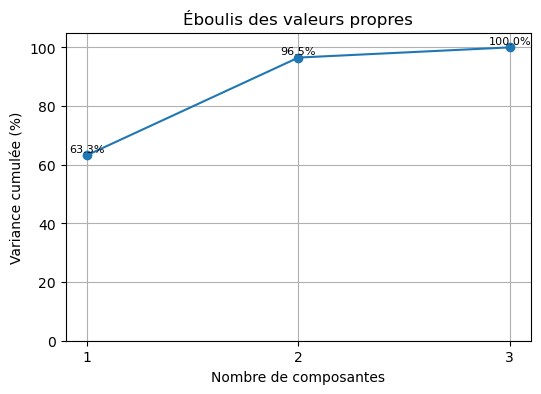

In [61]:
import numpy as np
import matplotlib.pyplot as plt


# Calculer la variance expliquée et la variance cumulée
ratio = pca.explained_variance_ratio_ * 100        # % par composante
cum = np.cumsum(ratio)                             # variance cumulée

# Vérification rapide (affiche les valeurs)
print("Variance individuelle (%):", np.round(ratio, 3))
print("Variance cumulée (%):    ", np.round(cum, 3))

# Graphe d'éboulis correct et robuste
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cum)+1), cum, marker='o')
plt.xticks(range(1, len(cum)+1))
for i, v in enumerate(cum, start=1):
    plt.text(i, v+1.0, f"{v:.1f}%", ha='center', fontsize=8)  # annoter les points

plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée (%)")
plt.title("Éboulis des valeurs propres")
plt.ylim(0, 105)
plt.grid(True)
plt.show()

dim1
dim2

### Cercle des corrélations

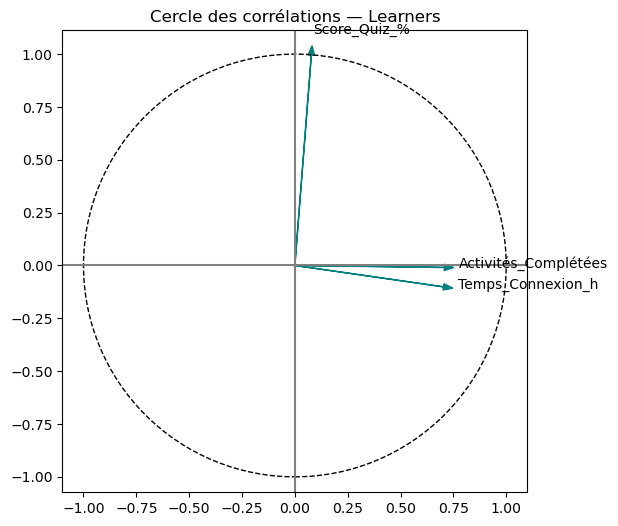

In [62]:
plt.figure(figsize=(6,6))
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

for i, var in enumerate(cols):
    plt.arrow(0, 0, pcs[0,i], pcs[1,i], head_width=0.03, color='teal')
    plt.text(pcs[0,i]*1.1, pcs[1,i]*1.1, var)

circle = plt.Circle((0,0), 1, fill=False, linestyle='--')
plt.gca().add_patch(circle)

plt.title("Cercle des corrélations — Learners")
plt.axis("equal")
plt.show()

In [ ]:
actiivité et temps sont tres bien represente et tres correler  et represente dim 1 



### Carte des apprenants

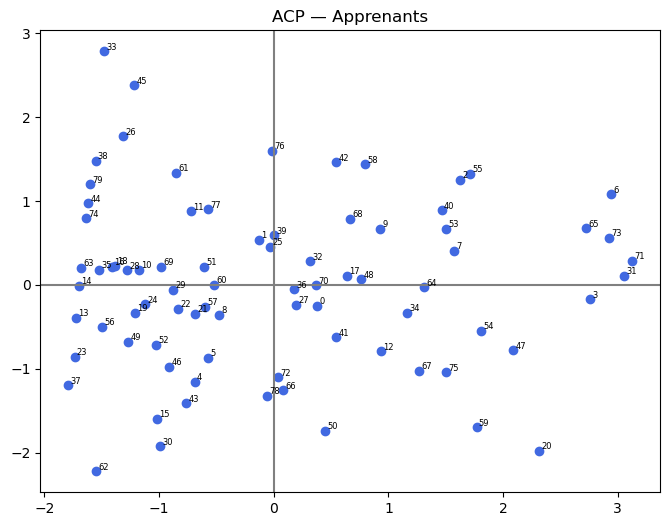

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1], color='royalblue')

for i in range(len(df_acp)):
    plt.text(coords[i,0]+0.02, coords[i,1]+0.02, str(df_acp.index[i]), fontsize=6)

plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
plt.title("ACP — Apprenants")
plt.show()

nuages de points on s'interaise sur les points de l'extraimité car ils sont bien representé
engagement,effort dim1
performance  dim 2
dim1:
individue extreme gauche(13,23,37) sont pas serieux (peu d'effort et de perfermance)
par contre (6,65,73) sont de bons apprenants (plus d'effort et de t'engageme)
dim2:
33,45 sont performant mais ils ne fait pas d'effort
par contre 62,30 sont null 
50,59,20 fonds les effors mais ils ne 
la performance pas de relation avec l'effort

In [25]:
'''
import pandas as pd

# pca.components_ → matrice (n_components x n_variables)

components_df = pd.DataFrame(
    pca.components_,
    columns=df.columns,                  # noms des variables
    index=[f"Dim{i+1}" for i in range(len(pca.components_))]   # noms des axes
)

print(components_df.iloc[:2, :])
'''

ValueError: Shape of passed values is (3, 3), indices imply (3, 4)